# Nasdaq Composite 週足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'IXIC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-21 00:00:00-04:00,14194.719727,14218.759766,14010.790039,14169.299805,5585100000,0.0,0.0
2022-03-28 00:00:00-04:00,14177.209961,14646.900391,14101.339844,14261.500000,27126270000,0.0,0.0
2022-04-04 00:00:00-04:00,14304.349609,14534.379883,13689.230469,13711.000000,24148400000,0.0,0.0
2022-04-11 00:00:00-04:00,13547.290039,13685.950195,13317.740234,13351.080078,19490360000,0.0,0.0
2022-04-18 00:00:00-04:00,13319.389648,13710.700195,12828.019531,12839.290039,23315200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,19590.849609,19644.230469,18372.990234,18847.279297,38388460000,0.0,0.0
2025-03-03 00:00:00-05:00,18923.359375,18992.300781,17768.589844,18196.220703,39509370000,0.0,0.0
2025-03-10 00:00:00-04:00,17840.320312,17868.080078,17238.240234,17754.089844,39800690000,0.0,0.0


In [3]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-23 00:00:00-04:00,7421.359863,7809.830078,7276.399902,7502.379883,12687420000,0.0,0.0
2020-03-30 00:00:00-04:00,7583.459961,7880.310059,7288.109863,7373.080078,18566200000,0.0,0.0
2020-04-06 00:00:00-04:00,7660.169922,8227.910156,7617.790039,8153.580078,15567990000,0.0,0.0
2020-04-13 00:00:00-04:00,8127.689941,8670.299805,8035.950195,8650.139648,18706100000,0.0,0.0
2020-04-20 00:00:00-04:00,8553.379883,8684.910156,8215.690430,8634.519531,18112980000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,19590.849609,19644.230469,18372.990234,18847.279297,38388460000,0.0,0.0
2025-03-03 00:00:00-05:00,18923.359375,18992.300781,17768.589844,18196.220703,39509370000,0.0,0.0
2025-03-10 00:00:00-04:00,17840.320312,17868.080078,17238.240234,17754.089844,39800690000,0.0,0.0


## Moving Median

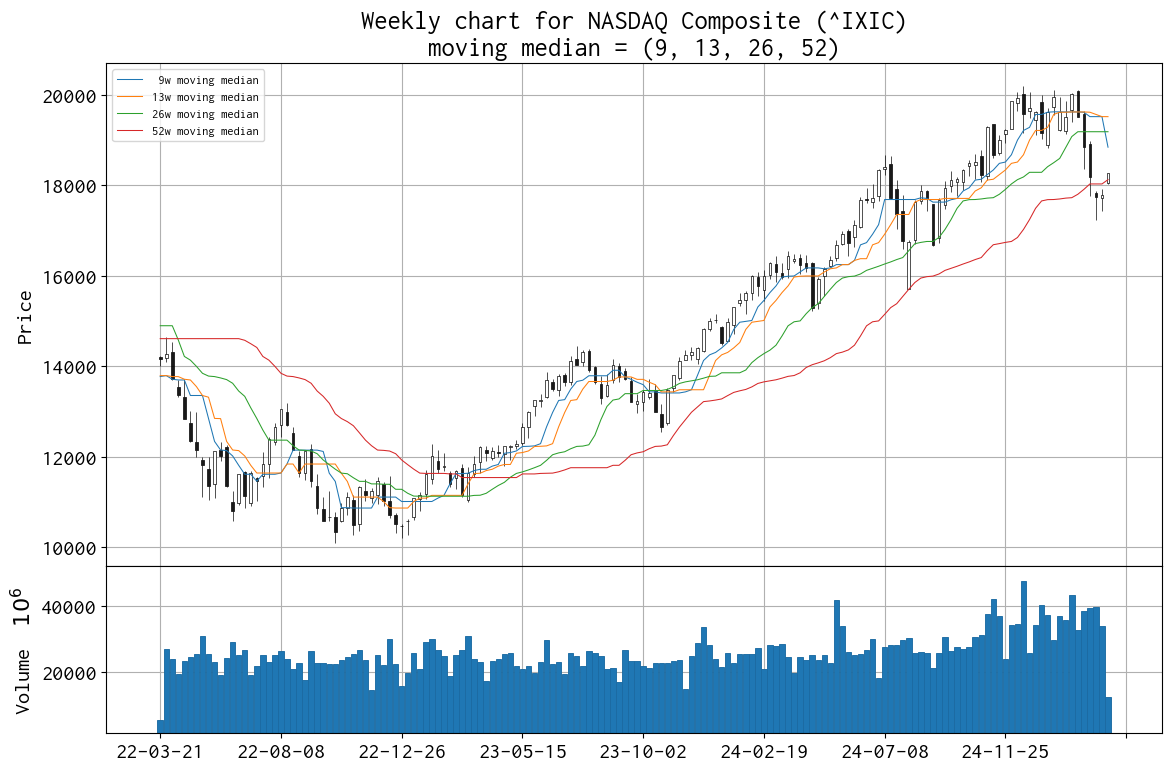

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-17 00:00:00-04:00,17722.539062,17925.939453,17431.669922,17784.050781,33995440000,0.0,0.0
2025-03-24 00:00:00-04:00,18046.189453,18281.134766,18030.679688,18271.855469,12579578000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-17 00:00:00-04:00    17784.050781
2025-03-24 00:00:00-04:00    18271.855469
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-17 00:00:00-04:00           NaN
2025-03-24 00:00:00-04:00    487.804688
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-24 00:00:00-04:00    225.666016
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-02-24 00:00:00-05:00    19621.679688
2025-03-03 00:00:00-05:00    19524.009766
2025-03-10 00:00:00-04:00    19524.009766
2025-03-17 00:00:00-04:00    19523.400391
2025-03-24 00:00:00-04:00    18847.279297
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-02-24 00:00:00-05:00    19627.439453
2025-03-03 00:00:00-05:00    19621.679688
2025-03-10 00:00:00-04:00    19572.599609
2025-03-17 00:00:00-04:00    19524.009766
2025-03-24 00:00:00-04:00    19523.400391
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-02-24 00:00:00-05:00    19189.900391
2025-03-03 00:00:00-05:00    19189.900391
2025-03-10 00:00:00-04:00    19189.900391
2025-03-17 00:00:00-04:00    19189.900391
2025-03-24 00:00:00-04:00    19189.900391
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-02-24 00:00:00-05:00    17913.054688
2025-03-03 00:00:00-05:00    18033.955078
2025-03-10 00:00:00-04:00    18033.955078
2025-03-17 00:00:00-04:00    18033.955078
2025-03-24 00:00:00-04:00    18128.719727
Name: Close, dtype: float64

## Robust Bollinger bands

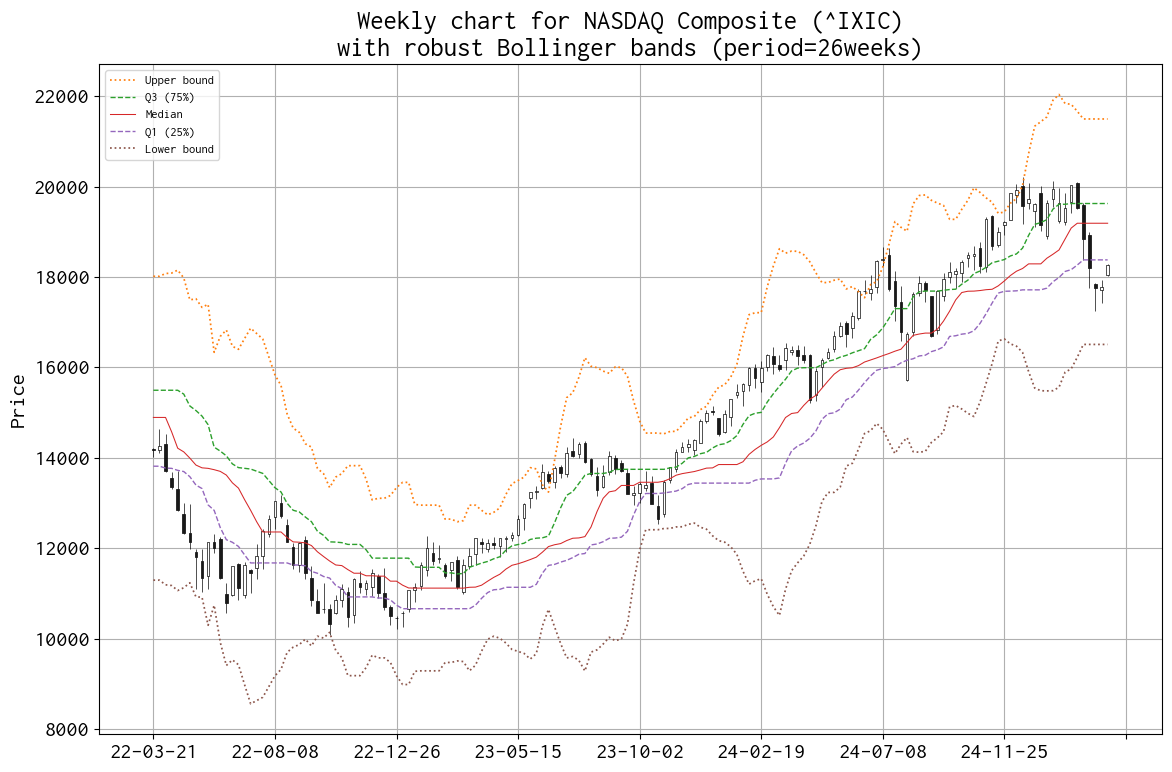

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 26
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

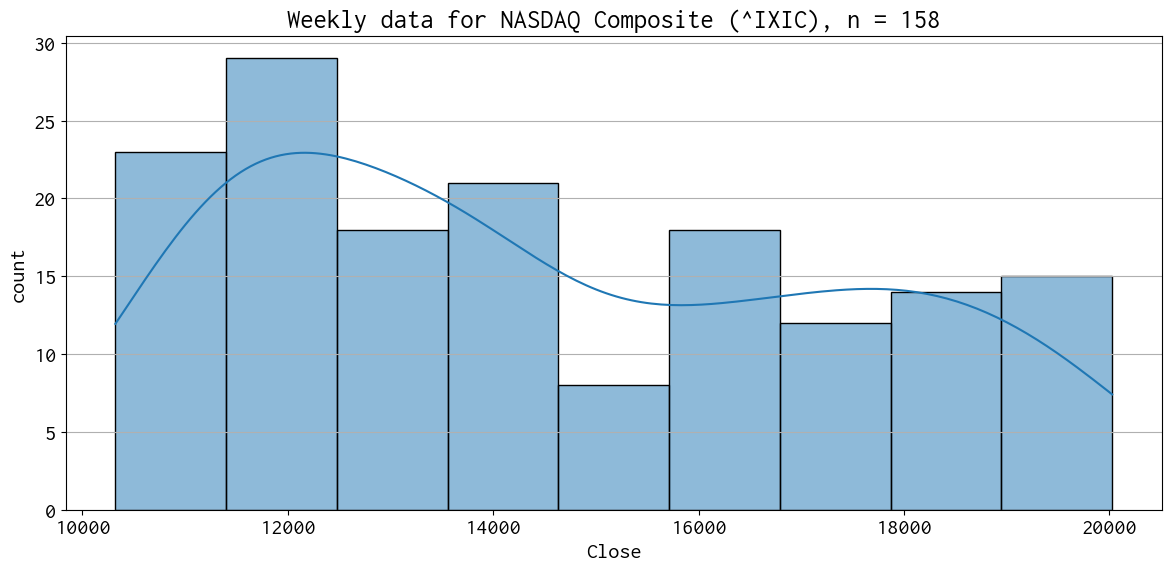

In [14]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()